In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 6.0)
pd.options.display.max_columns = 100

# Train

In [2]:
train_df = pd.read_csv('../input/train_2016_v2.csv', parse_dates=['transactiondate'])

In [3]:
train_df['transactiondate'] = train_df['transactiondate'].astype(datetime)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [5]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01 00:00:00
1,14366692,-0.1684,2016-01-01 00:00:00
2,12098116,-0.0040,2016-01-01 00:00:00
3,12643413,0.0218,2016-01-02 00:00:00
4,14432541,-0.0050,2016-01-02 00:00:00


### logerror

In [11]:
train_df['logerror'].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

(-0.34250000000000003, 0.4638819999999963)

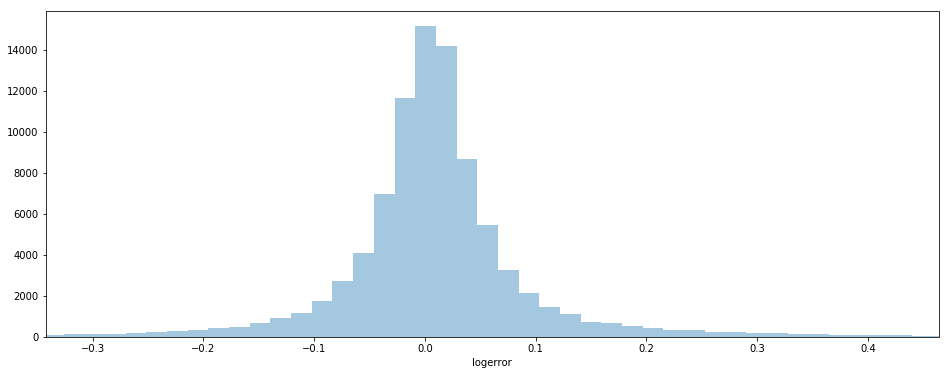

In [33]:
logerror_pct_1 = np.percentile(train_df['logerror'], 1)
logerror_pct_99 = np.percentile(train_df['logerror'], 99)
ax = sns.distplot(train_df['logerror'], bins=500, kde=False)
ax.set_xlim(logerror_pct_1, logerror_pct_99)

### transactiondate

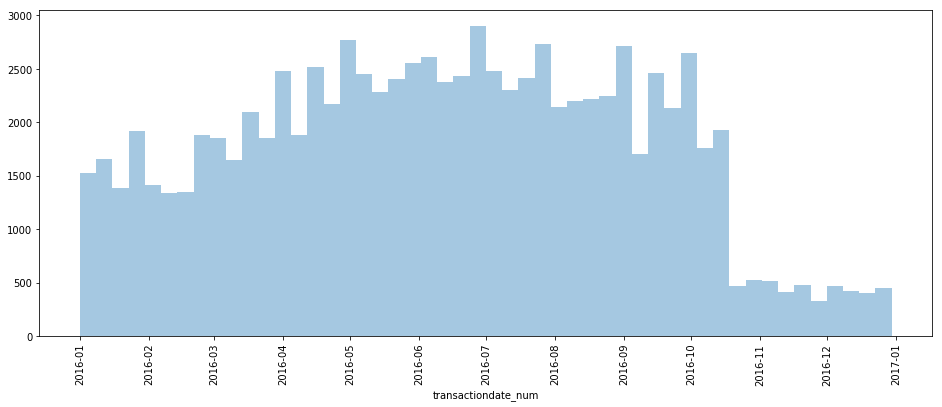

In [34]:
# transforms datetime to number of days
train_df['transactiondate_num'] = mdates.date2num(train_df['transactiondate'])

ax = sns.distplot(train_df['transactiondate_num'], kde=False)
plt.xticks(rotation=90)
# marks every month on the xaxis
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

There are less sales on the first trimester, and as the dataset description stated, only some sales after mid Oct 2016 are depicted here.

### parcelid

In [97]:
train_df['parcelid'].value_counts().reset_index(drop=True).value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

One property was sold 3 times, and 123 were sold 2 times.

### logerror x transactiondate

(735964.0, 736328.0)

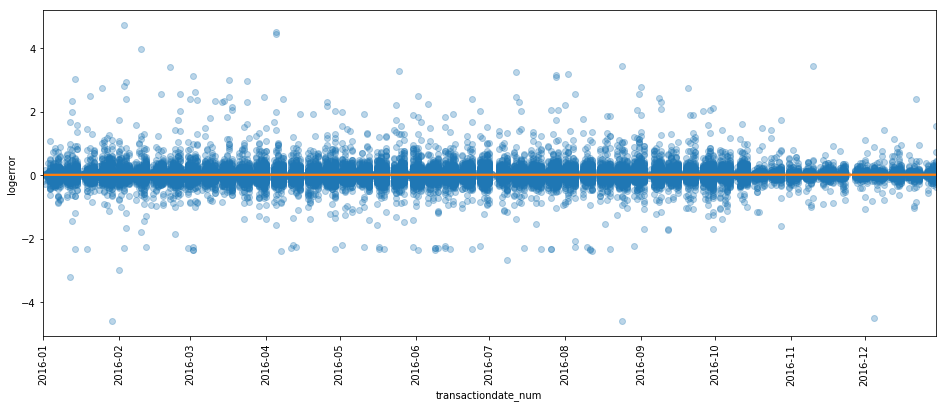

In [46]:
ax = sns.regplot(x='transactiondate_num',
                 y='logerror',
                 data=train_df,
                 scatter_kws={'alpha':0.3},
                 line_kws={'color':sns.color_palette()[1]})
plt.xticks(rotation=90)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
ax.set_xlim(np.percentile(train_df['transactiondate_num'], 0),
            np.percentile(train_df['transactiondate_num'], 100))

(0, 0.2)

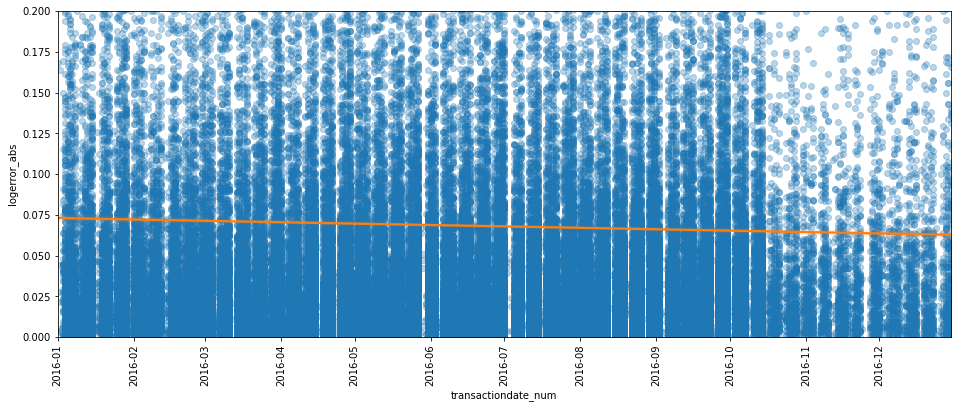

In [51]:
train_df['logerror_abs'] = train_df['logerror'].abs()

ax = sns.regplot(x='transactiondate_num',
                 y='logerror_abs',
                 data=train_df,
                 scatter_kws={'alpha':0.3},
                 line_kws={'color':sns.color_palette()[1]})
plt.xticks(rotation=90)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
ax.set_xlim(np.percentile(train_df['transactiondate_num'], 0),
            np.percentile(train_df['transactiondate_num'], 100))
ax.set_ylim(0, .2)

# Properties 2016

In [8]:
properties_df = pd.read_csv('../input/properties_2016.csv')
properties_df.shape

/Users/schiller/.virtualenvs/kaggle_zillow_prize/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [9]:
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [10]:
properties_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


### Joining with train_df

properties_df has data on 2985217 properties, but the ones that were sold matter more to us, so:

In [99]:
train_df = pd.merge(train_df, properties_df, how='left', on='parcelid')

### Missing values

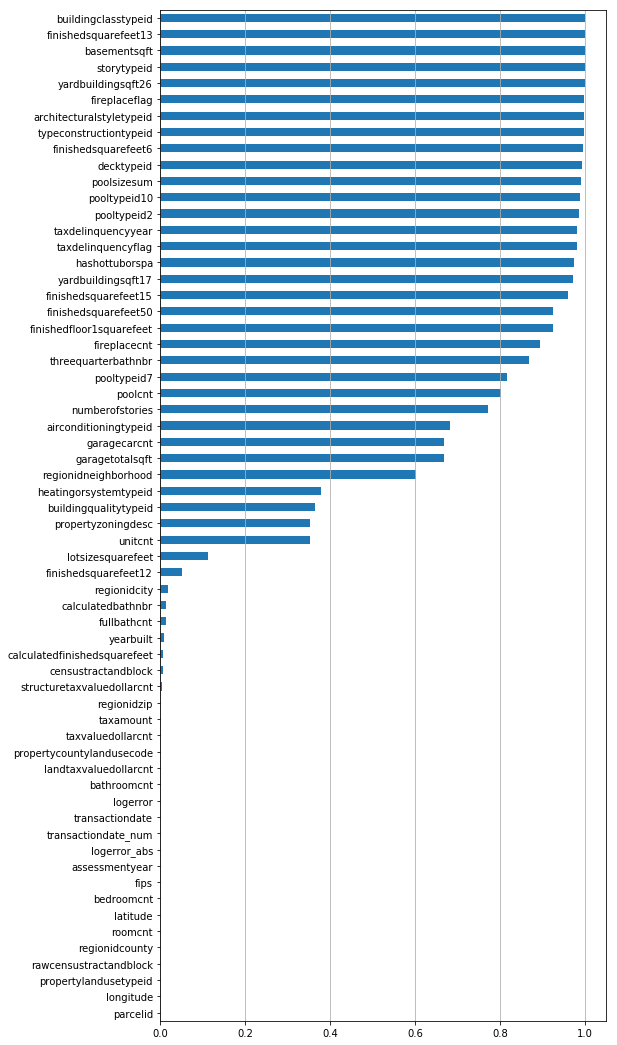

In [100]:
missing = train_df.isnull().sum() / train_df.isnull().count()
missing = missing.sort_values()

plt.figure(figsize=(8, len(missing) * .3))
ax = missing.plot(kind='barh')
ax.xaxis.grid(True)

# Analysing the variables

### airconditioningtypeid

In [102]:
train_df['airconditioningtypeid'].unique()

array([  1.,  nan,   5.,  13.,  11.,   9.,   3.])

### latitude and longitude

In [101]:
train_df

,parcelid,logerror,transactiondate,transactiondate_num,logerror_abs,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01 00:00:00,735964.0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01 00:00:00,735964.0,0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01 00:00:00,735964.0,0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02 00:00:00,735965.0,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02 00:00:00,735965.0,0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02 00:00:00,735965.0,0.2705,1.0,NaN,NaN,4.0,4.0,NaN,1.0,4.0,NaN,NaN,3067.0,3067.0,NaN,NaN,NaN,NaN,6037.0,NaN,4.0,NaN,NaN,NaN,2.0,33870089.0,-118402768.0,2708.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,HBR3YY,6.037621e+07,29712.0,3101.0,NaN,96109.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1982.0,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02 00:00:00,735965.0,0.0440,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,NaN,NaN,1297.0,1297.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,7.0,33899475.0,-118212720.0,6677.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,CORH*,6.037542e+07,24174.0,3101.0,NaN,96091.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1939.0,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02 00:00:00,735965.0,0.1638,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,853.0,1763.0,1763.0,NaN,NaN,853.0,NaN,6111.0,1.0,2.0,2.0,0.0,NaN,NaN,34207204.0,-119165589.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111003e+07,13150.0,2061.0,NaN,97101.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,1994.0,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-